<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Analysis and Graph Modeling

Network analysis is common used in the analysis of social networks, due to the huge amount of data, and more importantly, due to the data being networked structured.

A graph is a simple way to model a network, and a graph that models a social network is called a social graph.

Mathematically, a graph is commonly modeled as a matrix of units, and the following code will demonstrate examples of how a graph is modeled, as well as some unique properties of such a model.

## Matrix Model of a network

The following matrix models the network show here

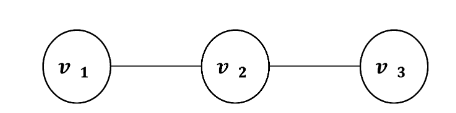

In [2]:
import numpy as np

A = np.matrix([
              [0, 1, 0],
              [1, 0, 1],
              [0, 1, 0]
               ])

print(A)

[[0 1 0]
 [1 0 1]
 [0 1 0]]


In the case where we want to figure out which node(s) is(are) the most central, for example who has the most followers on instagram, we can use the following program.

For the diagram shown before, node 2 would be the most central node.

In [5]:
import numpy as np

def calculate_degree_centrality(adjacency_matrix):
    """
    Calculate the degree centrality for each node in the graph.

    Parameters:
        adjacency_matrix (numpy.ndarray): The adjacency matrix of the graph.

    Returns:
        dict: A dictionary with nodes as keys and their degree centralities as values.
    """
    # Ensure the adjacency matrix is a numpy array
    adjacency_matrix = np.array(adjacency_matrix)

    # Check if the matrix is square
    if adjacency_matrix.shape[0] != adjacency_matrix.shape[1]:
        raise ValueError("The adjacency matrix must be square.")

    # Calculate the degree of each node
    degrees = adjacency_matrix.sum(axis=1)

    # Calculate degree centrality
    num_nodes = len(adjacency_matrix)
    degree_centrality = {node: degree / (num_nodes - 1) for node, degree in enumerate(degrees)}

    return degree_centrality


centrality = calculate_degree_centrality(A)

for node, centrality_value in centrality.items():
    print(f"Node {node + 1}: Degree Centrality = {centrality_value}")


Node 1: Degree Centrality = 0.5
Node 2: Degree Centrality = 1.0
Node 3: Degree Centrality = 0.5


Sometimes, we may also want to calculate a laplacian matrix or an incidence matrix of a graph that have many useful properties.

The formula to produce a laplacian matrix of a graph is shown below, as well as the code to generate a laplacian and incidence matrix for any given graph

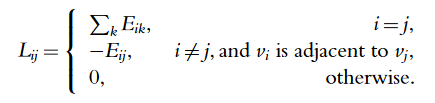

Where $L_{ij}$ correspond to the rows and columns of the lapacian matrix

The following code will use this graph as the example:

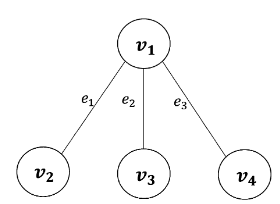

where
$e_1$ = 1
$e_2$ = 2
$e_3$ = 3

In [14]:

def generate_laplacian_matrix(adjacency_matrix):
    """
    Generate the Laplacian matrix for a graph.

    Parameters:
        adjacency_matrix (numpy.ndarray): The adjacency matrix of the graph.

    Returns:
        numpy.ndarray: The Laplacian matrix of the graph.
    """
    adjacency_matrix = np.array(adjacency_matrix)

    # Degree matrix (diagonal matrix of node degrees)
    degree_matrix = np.diag(adjacency_matrix.sum(axis=1))

    # Laplacian matrix: L = D - A
    laplacian_matrix = degree_matrix - adjacency_matrix

    return laplacian_matrix


def generate_incidence_matrix(adjacency_matrix):
    """
    Generate the incidence matrix for a graph.

    Parameters:
        adjacency_matrix (numpy.ndarray): The adjacency matrix of the graph.

    Returns:
        numpy.ndarray: The incidence matrix of the graph.
    """
    adjacency_matrix = np.array(adjacency_matrix)

    # Find all edges in the graph
    edges = []
    num_nodes = len(adjacency_matrix)
    for i in range(num_nodes):
        for j in range(i, num_nodes):  # Avoid duplicate edges in undirected graphs
            if adjacency_matrix[j][i] > 0:
                edges.append((j, i))

    # Initialize the incidence matrix
    incidence_matrix = np.zeros((len(adjacency_matrix), len(edges)))

    # Populate the incidence matrix
    for edge_idx, (i, j) in enumerate(edges):
        incidence_matrix[i][edge_idx] = (adjacency_matrix[i][j]) ** 0.5
        incidence_matrix[j][edge_idx] = -(adjacency_matrix[i][j]) ** 0.5  # Directed edges use -1 for the target

    return incidence_matrix

A = np.matrix([
              [0, 1, 2, 3],
              [1, 0, 0, 0],
              [2, 0, 0, 0],
              [3, 0, 0, 0]
               ])

print("Adjacency Matrix:")
print(A)
print()

print("Laplacian Matrix:")
print(generate_laplacian_matrix(A))
print()

print("Incidence Matrix:")
print(generate_incidence_matrix(A))
print()

Adjacency Matrix:
[[0 1 2 3]
 [1 0 0 0]
 [2 0 0 0]
 [3 0 0 0]]

Laplacian Matrix:
[[ 6 -1 -2 -3]
 [-1  1  0  0]
 [-2  0  2  0]
 [-3  0  0  3]]

Incidence Matrix:
[[-1.         -1.41421356 -1.73205081]
 [ 1.          0.          0.        ]
 [ 0.          1.41421356  0.        ]
 [ 0.          0.          1.73205081]]



Following are some of the properties that are useful about the laplacian matrix

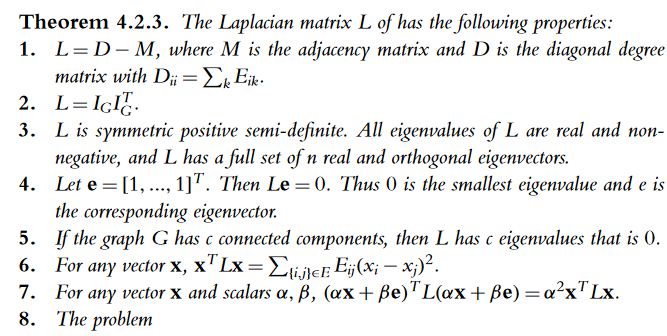